# Условия жизни и оценки по математике

In [138]:
# Download packeges
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

## Первичная обработка данных

In [139]:
# Скачать набор данных
df = pd.read_csv('stud_math.xls')

In [140]:
# Выводим первые 10 наблюдений
df.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


Мы видим что пропущеные значения обозначаются как NaN. Что бы все пустые значения отображались корректно заменим все пустые ячейки на NaN.

In [141]:
# in case of any empty cells we replace it with NaN
df = df.replace('', np.nan)

Теперь мы можем оценить количество пропущенных наблюдений для каждой переменной

In [142]:
df.isnull().sum()

school                  0
sex                     0
age                     0
address                17
famsize                27
Pstatus                45
Medu                    3
Fedu                   24
Mjob                   19
Fjob                   36
reason                 17
guardian               31
traveltime             28
studytime               7
failures               22
schoolsup               9
famsup                 39
paid                   40
activities             14
nursery                16
studytime, granular     7
higher                 20
internet               34
romantic               31
famrel                 27
freetime               11
goout                   8
health                 15
absences               12
score                   6
dtype: int64

Сравниваем в количеством не пустых наблюдений

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

Мы можем сделать вывод что в данном датасете не очень много пропущенных значений, самое большое значение 45 из 395 для переменной Pstatus

Для удобства работы переименуем некоторые переменные

In [144]:
# Rename the columns
df = df.rename(columns={"studytime, granular": "studytime",
                        'Pstatus': 'parents_status',
                        'Medu': 'mother_educ',
                        'Fedu': 'father_educ',
                        'Mjob': 'mother_job',
                        'Fjob': 'father_job',
                        'traveltime': 'travel_time',
                        'studytime': 'study_time',
                        'schoolsup': 'educ_sup',
                        'famsup': 'family_sup',
                        'paid': 'paid_math',
                        'famrel': 'family_rel',
                        'freetime': 'free_time',
                        'goout': 'friends_time',
                        'famsize': 'family_size',
                        'reason': 'reason_school',
                        'address': 'urban'})

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   school          395 non-null    object 
 1   sex             395 non-null    object 
 2   age             395 non-null    int64  
 3   urban           378 non-null    object 
 4   family_size     368 non-null    object 
 5   parents_status  350 non-null    object 
 6   mother_educ     392 non-null    float64
 7   father_educ     371 non-null    float64
 8   mother_job      376 non-null    object 
 9   father_job      359 non-null    object 
 10  reason_school   378 non-null    object 
 11  guardian        364 non-null    object 
 12  travel_time     367 non-null    float64
 13  study_time      388 non-null    float64
 14  failures        373 non-null    float64
 15  educ_sup        386 non-null    object 
 16  family_sup      356 non-null    object 
 17  paid_math       355 non-null    obj

У нас есть две переменные под одним именем - studytime.
Проверим идентичны ли они.

In [145]:
df[['study_time', 'studytime']].describe()

,study_time,studytime
count,388.000000,388.000000
mean,2.038660,-6.115979
std,0.842078,2.526235
min,1.000000,-12.000000
25%,1.000000,-6.000000
50%,2.000000,-6.000000
75%,2.000000,-3.000000
max,4.000000,-3.000000


Мы видим, что вторая studytime имеет только отрицательные значения. Поскольку время следует измерять только положительными значениями, нам нужно отбросить studytime с отрицательными значениями.

In [146]:
df.drop(df.columns[20], axis=1, inplace=True)

Для дальнейшего анализа разделим переменные на количественные и номинативные.

In [147]:
numeric = df.select_dtypes(include=np.number).columns.tolist()
factor = df.select_dtypes(exclude=np.number).columns.tolist()
print(len(numeric), len(factor))

12 17


У нас есть 12 количественныx и 17 номинативных переменных.

Проверим уникальные значения номинативных переменных

In [148]:
for var in factor:
    print(df[var].value_counts())

GP    349
MS     46
Name: school, dtype: int64
F    208
M    187
Name: sex, dtype: int64
U    295
R     83
Name: urban, dtype: int64
GT3    261
LE3    107
Name: family_size, dtype: int64
T    314
A     36
Name: parents_status, dtype: int64
other       133
services     98
at_home      58
teacher      55
health       32
Name: mother_job, dtype: int64
other       197
services    102
teacher      29
at_home      16
health       15
Name: father_job, dtype: int64
course        137
home          104
reputation    103
other          34
Name: reason_school, dtype: int64
mother    250
father     86
other      28
Name: guardian, dtype: int64
no     335
yes     51
Name: educ_sup, dtype: int64
yes    219
no     137
Name: family_sup, dtype: int64
no     200
yes    155
Name: paid_math, dtype: int64
yes    195
no     186
Name: activities, dtype: int64
yes    300
no      79
Name: nursery, dtype: int64
yes    356
no      19
Name: higher, dtype: int64
yes    305
no      56
Name: internet, dtype: int64
no

Изменим некоторые значения для лучшего понимания

In [149]:
df.replace('F', 'Female', inplace=True)
df.replace('M', 'Male', inplace=True)

df.replace('U', 'Urban', inplace=True)
df.replace('R', 'Rural', inplace=True)

df.replace('GT3', '4+', inplace=True)
df.replace('LE3', '1-3', inplace=True)

df.replace('T', 'Living together', inplace=True)
df.replace('A', 'Living separately', inplace=True)

df.replace('other', 'Other', inplace=True)
df.replace('services', 'Civil Service', inplace=True)
df.replace('at_home', 'Unemployed', inplace=True)
df.replace('teacher', 'Teacher', inplace=True)
df.replace('health', 'Health Care', inplace=True)

df.replace('course', 'Educational Program', inplace=True)
df.replace('home', 'Home Proximity', inplace=True)
df.replace('reputation', 'School Reputation', inplace=True)

df.replace('mother', 'Mother', inplace=True)
df.replace('father', 'Father', inplace=True)

df.replace('yes', 'Yes', inplace=True)
df.replace('no', 'No', inplace=True)

Количественные переменные я проверю одну за одной на предмет вбросов.

<strong>Age<strong>

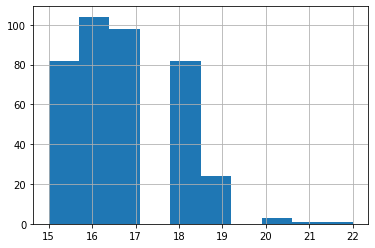

In [150]:
df.age.describe()
df.age.hist()
# У нас есть потенциальные вбросы, студенты старше 19 лет

In [151]:
# Чтобы упростить код, я определяю функцию "iqr (x)" для вычисления iqr для
# заданной переменной x и диапазон выбросов
def iqr(x):
    IQR = df[x].quantile(0.75) - df[x].quantile(0.25)
    perc25 = df[x].quantile(0.25)
    perc75 = df[x].quantile(0.75)
    print('25th quantile: {},'.format(perc25),
          '75-й quantile: {},'.format(perc75),
          "IQR: {}, ".format(IQR),
          "Outliers' range: [{f}, {l}].".format(f=perc25 - 1.5*IQR,
                                                l=perc75 + 1.5*IQR))
    df[x].loc[df[x].between(perc25 - 1.5*IQR,
                            perc75 + 1.5*IQR)].hist(label='IQR')
    plt.legend()

25th quantile: 16.0, 75-й quantile: 18.0, IQR: 2.0,  Outliers' range: [13.0, 21.0].


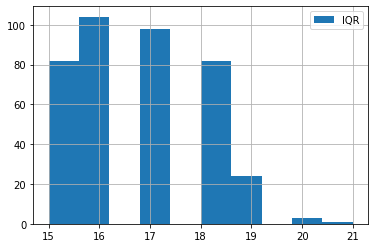

In [152]:
# Вычисляем диапазон выбросов для "age"
iqr('age')

Этот метод говорит нам, что только учащиеся старше 21 года являются выбросами.

Поскольку этот набор данных включает ТОЛЬКО школьников, я думаю, что лучше всего оставить в нем только учеников младше 19 лет, поскольку этот возраст более типичен для выпускников школ.

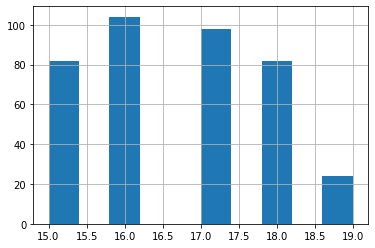

In [153]:
df = df.loc[df.age.between(15, 19)]
df.age.hist()

<strong>Mother's Education<strong>

In [154]:
df.mother_educ.describe()
df.mother_educ.value_counts()

4.0    130
2.0    101
3.0     95
1.0     58
0.0      3
Name: mother_educ, dtype: int64

В наборе данных нет никаких признаков выбросов. Поскольку данные мировые, вполне возможно что некоторые матери не получают образования вообще (mother_educ == 0), по этому мы не будем считать mother_educ == 0 за выбросы.

<strong>Father's Education<strong>

In [155]:
df.father_educ.describe()
df.father_educ.value_counts()

2.0     103
3.0      96
4.0      88
1.0      76
0.0       2
40.0      1
Name: father_educ, dtype: int64

Как было объяснено в предыдущем разделе, father_education == 0 не является выбросом.

Однако у нас есть явный выброс: father_education == 40

In [156]:
df = df.loc[df.father_educ.between(0, 4)]  # удаляем выбросы

<strong>Time to get to school<strong>

In [157]:
df.travel_time.value_counts()

1.0    221
2.0     91
3.0     21
4.0      7
Name: travel_time, dtype: int64

Мы наблюдаем только 7 учеников, которые добираются до школы более чем за 60 минут.

25th quantile: 1.0, 75-й quantile: 2.0, IQR: 1.0,  Outliers' range: [-0.5, 3.5].


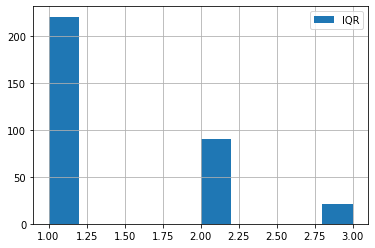

In [158]:
# Вычисляем диапазон выбросов для "travel_time"
iqr('travel_time')

Верхняя граница интервала равна 3,5, что дает нам причину сбросить наблюдения с travel_time > 3,5.

In [159]:
df = df.loc[df.travel_time.between(1, 3)]

<strong>Study Time<strong>

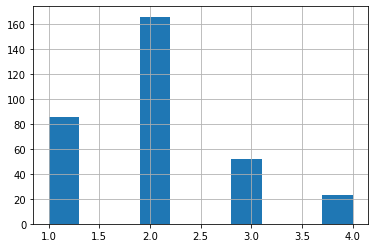

In [160]:
df.study_time.value_counts()
df.study_time.hist()

# Никаких признаков выбросов

<strong>Failures<strong>

In [161]:
print(df.failures.describe())
df.failures.value_counts()

count    317.000000
mean       0.296530
std        0.684656
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64


0.0    254
1.0     42
2.0     11
3.0     10
Name: failures, dtype: int64

In [162]:
# Имеет смысл преобразовать эту переменную в категориальную переменную
df.failures.replace(1, '1-3', inplace=True)
df.failures.replace(2, '1-3', inplace=True)
df.failures.replace(3, '1-3', inplace=True)
df.failures.replace(0, '4+', inplace=True)

df.failures.value_counts()

4+     254
1-3     63
Name: failures, dtype: int64

<strong>Family Relationships<strong>

In [163]:
print(df.family_rel.describe())
df.family_rel.value_counts()

count    311.000000
mean       3.922830
std        0.916071
min       -1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: family_rel, dtype: float64


 4.0    158
 5.0     79
 3.0     53
 2.0     15
 1.0      5
-1.0      1
Name: family_rel, dtype: int64

In [164]:
# Удалить выброс: family_rel==-1
df = df.loc[df.family_rel.between(1, 5)]

<strong>Free Time<strong>

count    301.000000
mean       3.205980
std        0.985274
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: free_time, dtype: float64


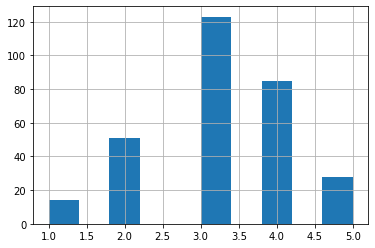

In [165]:
print(df.free_time.describe())
df.free_time.hist()

# Никаких признаков выбросов

<strong>Friends Time<strong>

count    303.000000
mean       3.099010
std        1.087298
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: friends_time, dtype: float64


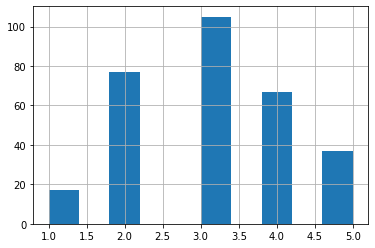

In [166]:
print(df.friends_time.describe())
df.friends_time.hist()

# Никаких признаков выбросов

<strong>Health<strong>

count    299.000000
mean       3.411371
std        1.390767
min        1.000000
25%        2.000000
50%        3.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64


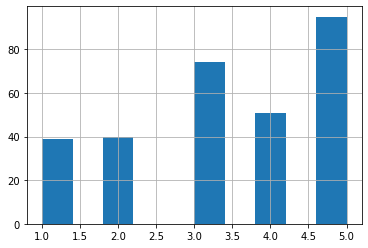

In [167]:
print(df.health.describe())
df.health.hist()

# Никаких признаков выбросов

<strong>Absences<strong>

count    298.000000
mean       6.912752
std       23.239330
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64


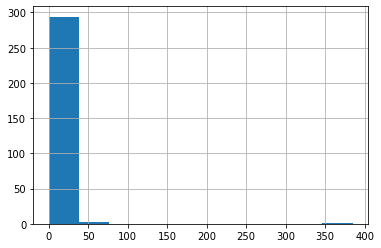

In [168]:
print(df.absences.describe())
df.absences.hist()

Мы видим, что большинство наблюдений находятся в диапазоне от 0 до 50, это признак выбросов.

25th quantile: 0.0, 75-й quantile: 8.0, IQR: 8.0,  Outliers' range: [-12.0, 20.0].


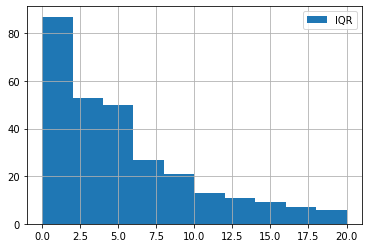

In [169]:
# Вычисляем диапазон выбросов для "absences"
iqr('absences')

Верхняя граница диапазона 20, можно отбросить наблюдения с более чем 20 пропущенными занятиями.

In [170]:
df = df.loc[df.absences.between(0, 20)]

<strong>Score<strong>

count    279.000000
mean      52.043011
std       22.639296
min        0.000000
25%       45.000000
50%       55.000000
75%       67.500000
max      100.000000
Name: score, dtype: float64


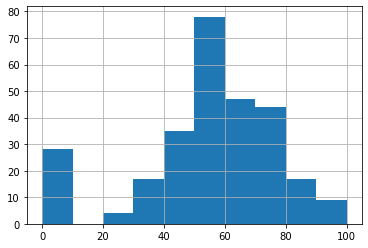

In [171]:
print(df.score.describe())
df.score.hist()

Похоже, оценка за тест варьируется от 20 до 100. Мы можем предположить, что если оценка равна 0, это означает, что студент не сдавал экзамен по математике. Поскольку конечная цель - предсказать оценку за тест, а не участие в тесте, мы можем опустить наблюдение со score == 0.

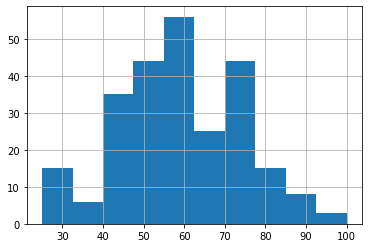

In [172]:
df = df.loc[df.score.between(20, 100)]
df.score.hist()

In [173]:
# Обновим numeric и factor так как мы изменили тип одной переменной
numeric = df.select_dtypes(include=np.number).columns.tolist()
factor = df.select_dtypes(exclude=np.number).columns.tolist()

## Корреляционный анализ - количественные переменные

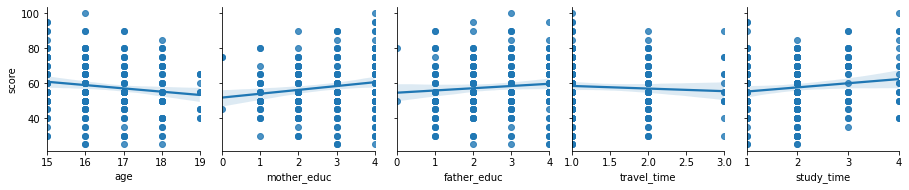

In [174]:
# С 11 числовыми переменными сложно визуализировать все графики вместе,
# поэтому я их разделяю
sns.pairplot(data=df,
             y_vars=['score'],
             x_vars=['age', 'mother_educ', 'father_educ', 'travel_time',
                     'study_time'], kind='reg')

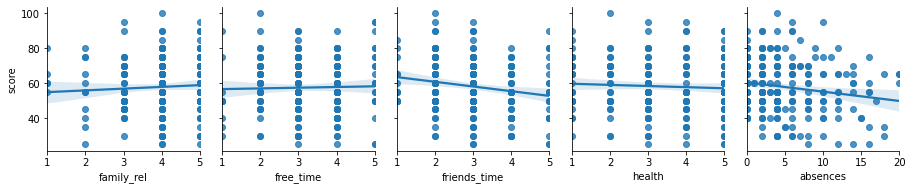

In [175]:
sns.pairplot(data=df,
             y_vars=['score'],
             x_vars=['family_rel', 'free_time', 'friends_time',
                     'health', 'absences'], kind='reg')

In [176]:
df.corr()

,age,mother_educ,father_educ,travel_time,study_time,family_rel,free_time,friends_time,health,absences,score
age,1.000000,-0.173664,-0.108582,0.142199,0.029080,-0.041455,-0.059791,0.070858,-0.009523,0.167872,-0.141664
mother_educ,-0.173664,1.000000,0.633060,-0.123666,0.059305,0.008021,0.013154,0.081579,-0.036609,0.091525,0.157554
father_educ,-0.108582,0.633060,1.000000,-0.134001,-0.052266,0.030304,-0.012486,0.054507,0.036666,0.012251,0.091197
travel_time,0.142199,-0.123666,-0.134001,1.000000,-0.149130,-0.052300,-0.025814,-0.116722,0.010862,-0.072751,-0.058354
study_time,0.029080,0.059305,-0.052266,-0.149130,1.000000,0.100514,-0.114216,-0.006765,-0.109600,-0.072076,0.134276
family_rel,-0.041455,0.008021,0.030304,-0.052300,0.100514,1.000000,0.142908,0.027948,0.136796,-0.070977,0.058295
free_time,-0.059791,0.013154,-0.012486,-0.025814,-0.114216,0.142908,1.000000,0.282008,0.098489,0.102626,0.026127
friends_time,0.070858,0.081579,0.054507,-0.116722,-0.006765,0.027948,0.282008,1.000000,0.048874,0.062074,-0.187256
health,-0.009523,-0.036609,0.036666,0.010862,-0.109600,0.136796,0.098489,0.048874,1.000000,0.029504,-0.058775
absences,0.167872,0.091525,0.012251,-0.072751,-0.072076,-0.070977,0.102626,0.062074,0.029504,1.000000,-0.168982


Score отрицательно корелирует с age, friend_time and absences.

Score позитивно корелирует с mother_educ, and study_time. 

Кореляция с father_educ, travel_time, family_rel, free_time и health очень слабая. Мы можем исключить их из дальнейшего анализа.

In [177]:
df = df.drop(['travel_time', 'family_rel',
              'free_time', 'health', 'father_educ'], 1)

## Анализ номинативных переменных

Чтобы выбрать хорошие предикторы оценок за экзамен по математике среди категориальных переменных, мы можем проследить, как распределение оценок зависит от значений заданных переменных. Для этого мы сделаем boxplot для каждой переменной. 

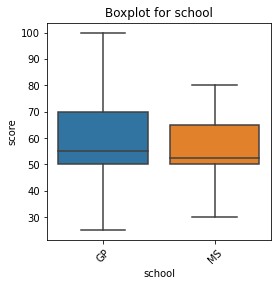

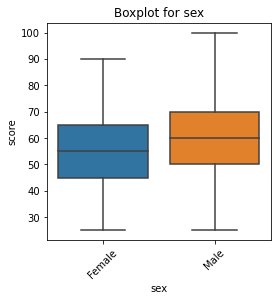

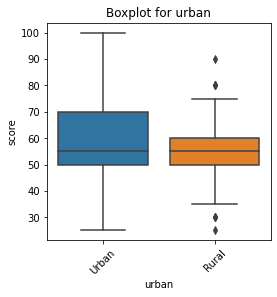

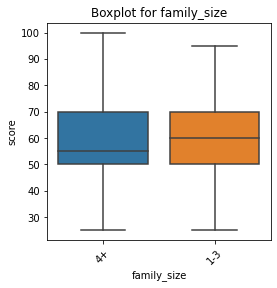

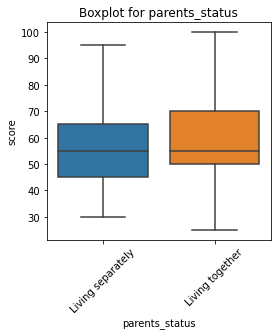

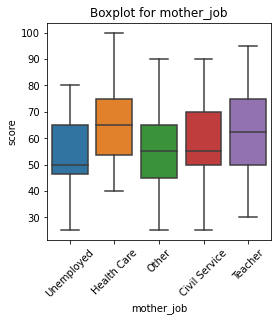

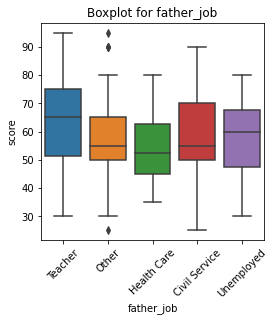

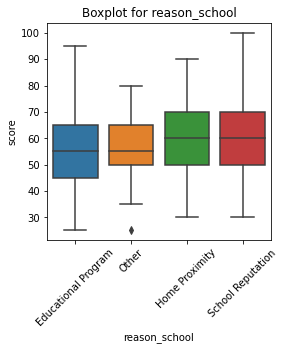

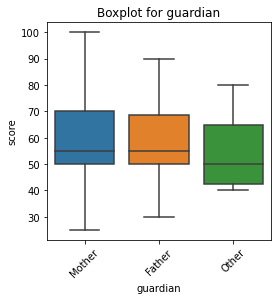

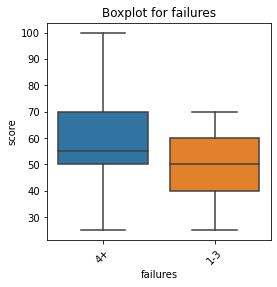

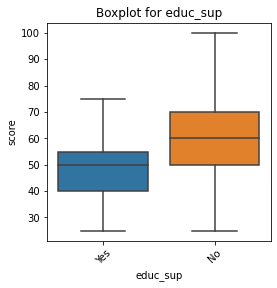

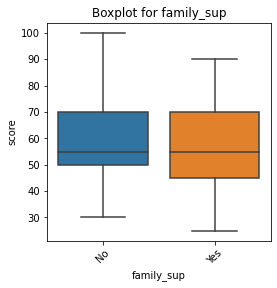

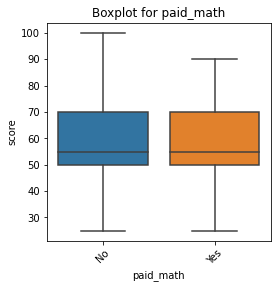

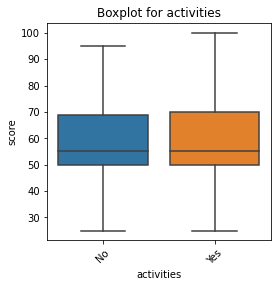

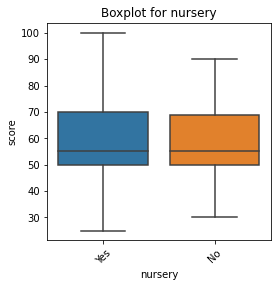

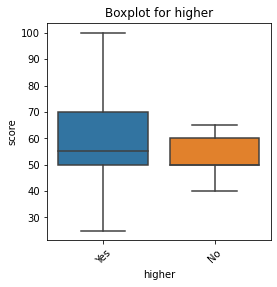

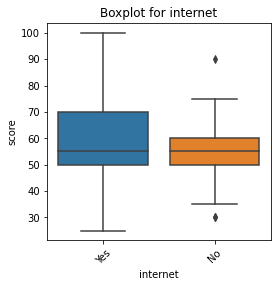

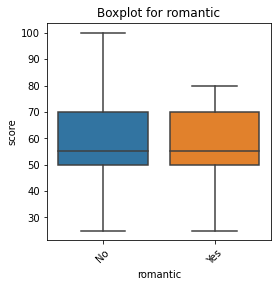

In [178]:
for var in factor:
    fig, ax = plt.subplots(figsize=(4, 4))
    sns.boxplot(x=var, y='score', data=df)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + var)
    plt.show()

Согласно графикам, оценка зависит от всех категориальных переменных, кроме  family_size, parents_status, family_sup, paid_math and activities.

Давайте проверим зависимость с помощью теста Студента. Мы протестируем можно ли отвергнуть гипотезу H0: математические ожидания заданной переменной в двух выборок одинаковы; в пользу H1: математические ожидания заданной переменной в двух выборок различны.

In [179]:
def get_stat_dif(column):
    # Функция вычисляет p-value для t-test и указывает елси
    # p-value достаточно маленькое для того что бы отвергнуть H0
    # (H0: математические ожидания заданной переменной в двух выборок одинаковы)
    # индексы уникальных значений
    cols = df.loc[:, column].value_counts().index
    # все попарные комбинации индексов
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(df.loc[df.loc[:, column] == comb[0], 'score'],
                     df.loc[df.loc[:, column] == comb[1],
                            'score']).pvalue <= 0.05/len(combinations_all):
            print('Найдены статистически значимые различия для variable', column)
            break

In [180]:
for col in factor:
    get_stat_dif(col)

Найдены статистически значимые различия для variable sex
Найдены статистически значимые различия для variable urban
Найдены статистически значимые различия для variable mother_job
Найдены статистически значимые различия для variable failures
Найдены статистически значимые различия для variable educ_sup


Мы отклоняем H0 для 5 категориальных переменных: sex, urban, mother_job, failures and school_sup. Мы сохраняем их как для дальнейшей работы.

In [181]:
for i in ['sex', 'urban', 'mother_job', 'failures', 'school_sup']:
    if i in factor:
        factor.remove(i)  # factor сохранит только ненужные переменные

# удалить переменные из конечных данных - df_model
df_model = df.drop(factor, 1)

In [182]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 251 entries, 0 to 394
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sex           251 non-null    object 
 1   age           251 non-null    int64  
 2   urban         244 non-null    object 
 3   mother_educ   249 non-null    float64
 4   mother_job    240 non-null    object 
 5   study_time    247 non-null    float64
 6   failures      239 non-null    object 
 7   friends_time  246 non-null    float64
 8   absences      251 non-null    float64
 9   score         251 non-null    float64
dtypes: float64(5), int64(1), object(4)
memory usage: 31.6+ KB


Теперь набор данных df_model включает переменные, которые мы будем использовать для оценки модели. 

# Выводы

Итак, в результате EDA для анализа условий жизни учащихся на их успеваемость по математике, были получены следующие выводы: 
 - В данных мало пустых значений, самое большое значение 45 из 395 для переменной parents_status
 - Небольшое количество выбросов найдены в переменных: age father_educ travel_time family_rel absences
 - Переменная score содержит наибольшое количтсво выбросов, поскольку в базу данных по всей видимости включили учеников не сдававших экзамен по математике. Эту информацию стоит уточнить, поскольку если это так, то для поставленной задачи - анализа условий жизни учащихся на их успеваемость, эти наблюдения не подходят. Если же одна из задач будет оценить анализа условий жизни учащихся на вероятность сдачи экзамены, тогда эти наблюдения стоит включить в анализ.
 - Отрицательная корреляция параметра score и absences предсказуемо говорит о том что чем больше ученик пропускает занятия, тем хуже он сдает экзамен. Напротив, положительная корреляция score и study_time свидетельствует о том что чем больше времени школьник тратит на учебу, тем выше у него оценка. Интересно что наличие или отсутствие платных занятий по математике не имеет эффекта на финальную оценку.
 - Уровень образование матери влияет на успеешность сдачи экзамена в большей степени, чем уровень образования отца, та же тенденция прослеживается и с участием в рынке труда родителей
 - Интересно что дети, которые переживали большее количество внеучебеых неудач имеют в средем оценки выше
 - Самые важные параметры, которые предлагается использовать в дальнейшем для построения модели, это sex, age, urban, mother_educ, mother_job, study_time, failures, friends_time, absences